# Classification des données Iris par Keras

## Environnement

In [1]:
from pandas import read_csv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Les données

### Import

In [2]:
data = read_csv("/home/noura/Projets/Keras_Iris/Datas/iris.data", 
                names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])

### Exploration

In [3]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Vérifier que les données soient réelles

In [6]:
output_verif = data.applymap(np.isreal).all(0)
output_verif

sepal length     True
sepal width      True
petal length     True
petal width      True
species         False
dtype: bool

In [ ]:
data.shape # vérification des dimensions

### Visualisation par espèce

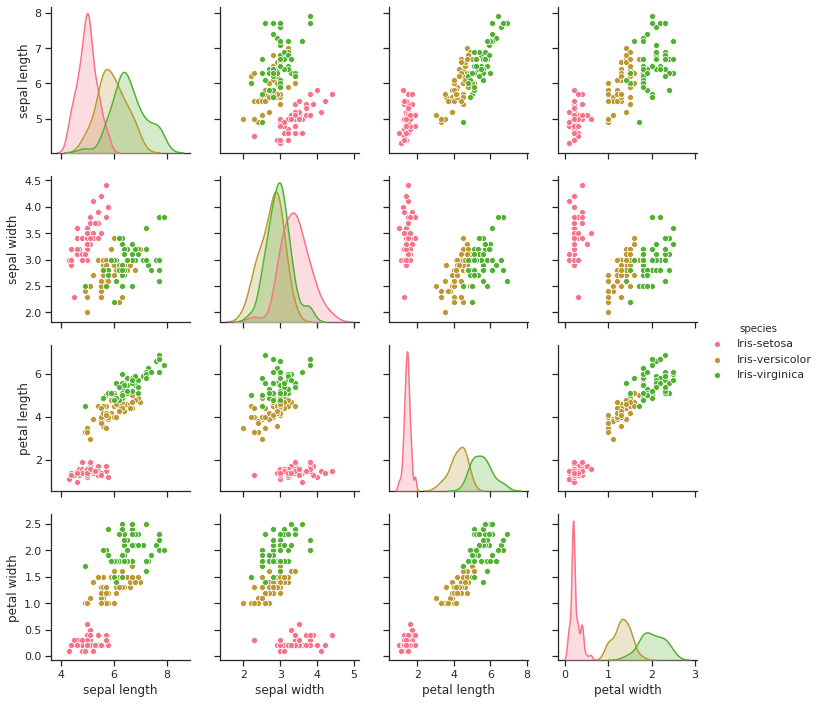

In [7]:
sns.set(style = "ticks")
sns.set_palette("husl")
sns.pairplot(data.iloc[:,0:5], hue="species")

## Mise en place du modele

### Préparation des données

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
#Définition de X : attention X est un numpy
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']].to_numpy()
X.shape

(150, 4)

In [10]:
#Définition de Y
Y = data[['species']]
Y.shape

(150, 1)

In [11]:
#Il faut à présent trier les Y par catégorie
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils

In [14]:
encoder = LabelEncoder()
Y_encod = encoder.fit_transform(Y) #les espèces sont encodées en integer

In [15]:
Y_onehot = np_utils.to_categorical(Y_encod) #Y est trié selon les catégories càd selon les 3 sorties attendues

In [16]:
Y_onehot.shape

(150, 3)

In [17]:
Y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Le modèle

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input, Model

In [19]:
#choix d'un modèle séquentiel
model = Sequential()
#1ère couche dense composée de 10 neuronnes pour les 4 inputs (mesures métriques). La fonction est sigmoïde
model.add(Dense(10, input_dim=4, activation="sigmoid"))
#2eme et 3éme couches denses : idem 1ère en diminuant le nombre de neuronnes (pas besoin de préciser les inputs)
model.add(Dense(8, activation="sigmoid"))
model.add(Dense(6, activation="sigmoid"))
#dernière couche dense : le nbre de neuronnes doit correspondre aux nombres de catégories (species)
model.add(Dense(3, activation="sigmoid"))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________
None


## Compilations et résultats

### Sur le jeux de données complet

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Il y a plus de 2 ouput, on choisit donc une focntion loss de type categorical_crossentropy

In [22]:
history = model.fit(X, Y_onehot, epochs=150, batch_size=10,verbose=1)

Epoch 1/150
15/15 [==============================] - 0s 698us/step - loss: 1.1217 - accuracy: 0.3333
Epoch 2/150
15/15 [==============================] - 0s 1ms/step - loss: 1.1167 - accuracy: 0.3333
Epoch 3/150
15/15 [==============================] - 0s 614us/step - loss: 1.1132 - accuracy: 0.3333
Epoch 4/150
15/15 [==============================] - 0s 1ms/step - loss: 1.1096 - accuracy: 0.3333
Epoch 5/150
15/15 [==============================] - 0s 743us/step - loss: 1.1072 - accuracy: 0.3333
Epoch 6/150
15/15 [==============================] - 0s 1ms/step - loss: 1.1051 - accuracy: 0.3333
Epoch 7/150
15/15 [==============================] - 0s 1ms/step - loss: 1.1029 - accuracy: 0.3333
Epoch 8/150
15/15 [==============================] - 0s 642us/step - loss: 1.1015 - accuracy: 0.3333
Epoch 9/150
15/15 [==============================] - 0s 865us/step - loss: 1.0995 - accuracy: 0.3333
Epoch 10/150
15/15 [==============================] - 0s 1ms/step - loss: 1.0977 - accuracy: 0.3333

15/15 [==============================] - 0s 808us/step - loss: 0.5513 - accuracy: 0.8200
Epoch 82/150
15/15 [==============================] - 0s 834us/step - loss: 0.5486 - accuracy: 0.8200
Epoch 83/150
15/15 [==============================] - 0s 861us/step - loss: 0.5457 - accuracy: 0.8800
Epoch 84/150
15/15 [==============================] - 0s 750us/step - loss: 0.5429 - accuracy: 0.9000
Epoch 85/150
15/15 [==============================] - 0s 636us/step - loss: 0.5403 - accuracy: 0.9467
Epoch 86/150
15/15 [==============================] - 0s 666us/step - loss: 0.5379 - accuracy: 0.9667
Epoch 87/150
15/15 [==============================] - 0s 793us/step - loss: 0.5352 - accuracy: 0.9600
Epoch 88/150
15/15 [==============================] - 0s 622us/step - loss: 0.5327 - accuracy: 0.9667
Epoch 89/150
15/15 [==============================] - 0s 665us/step - loss: 0.5303 - accuracy: 0.9600
Epoch 90/150
15/15 [==============================] - 0s 678us/step - loss: 0.5279 - accuracy: 

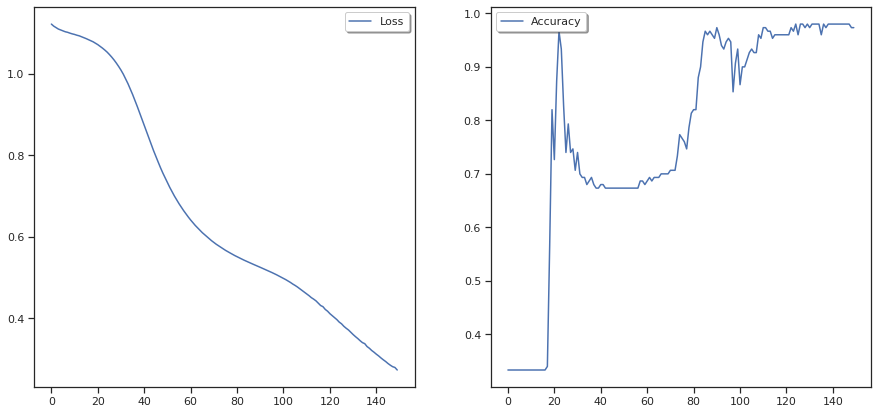

In [23]:
#Représentation graphiques des performances du modèle
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Loss') 
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Accuracy') 
legend = ax2.legend(loc='best', shadow=True)

In [24]:
#Evaluation
eval = model.evaluate(X,Y_onehot)

5/5 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.9800


In [25]:
print("Accuracy: %.1f" % (eval[1]*100))
print("Loss: %.1f" % (eval[0]*100))

Accuracy: 98.0
Loss: 27.1


In [26]:
#Prédiction
prediction = model.predict(X)
for i in range(20):
    print(prediction[i])

[0.5365225  0.03785801 0.00727531]
[0.531516   0.03826162 0.00734359]
[0.5346478  0.0380086  0.00730085]
[0.5311873  0.03828827 0.00734806]
[0.5371579  0.03780711 0.00726676]
[0.53528565 0.03795743 0.00729212]
[0.5341756  0.03804684 0.00730738]
[0.5348409  0.03799295 0.00729811]
[0.52949375 0.03842613 0.00737134]
[0.5331202  0.03813139 0.00732154]
[0.5373095  0.03779492 0.00726464]
[0.5337044  0.03808448 0.00731364]
[0.5330433  0.0381377  0.00732258]
[0.5355585  0.03793535 0.00728852]
[0.54027134 0.03755909 0.00722477]
[0.5395561  0.0376161  0.00723439]
[0.53807896 0.03773388 0.00725433]
[0.53546566 0.03794295 0.00728974]
[0.53572434 0.03792197 0.00728607]
[0.5369377  0.03782484 0.00726974]


### Séparer le jeux de données : Apprentissage et validation

In [27]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size = 0.2, random_state=0)

In [54]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='softmax'))

In [55]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
#Apprentissage du même modèle sur les nouvelles données d'apprentissage
history = model.fit(X_train, Y_train, epochs=200, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1085 - accuracy: 0.3889 - val_loss: 1.1704 - val_accuracy: 0.1667
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.3889 - val_loss: 1.1660 - val_accuracy: 0.1667
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.3889 - val_loss: 1.1633 - val_accuracy: 0.1667
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.3889 - val_loss: 1.1586 - val_accuracy: 0.1667
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0954 - accuracy: 0.3889 - val_loss: 1.1546 - val_accuracy: 0.1667
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0933 - accuracy: 0.3889 - val_loss: 1.1552 - val_accuracy: 0.1667
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0921 - accuracy: 0.3889 - val_loss: 1.1532 - val_accuracy: 0.1667
Epoch 8/200


Epoch 59/200
11/11 [==============================] - 0s 3ms/step - loss: 0.8138 - accuracy: 0.7037 - val_loss: 0.8511 - val_accuracy: 0.5833
Epoch 60/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7037 - val_loss: 0.8434 - val_accuracy: 0.5833
Epoch 61/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7918 - accuracy: 0.7037 - val_loss: 0.8316 - val_accuracy: 0.5833
Epoch 62/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.7037 - val_loss: 0.8209 - val_accuracy: 0.5833
Epoch 63/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.7037 - val_loss: 0.8102 - val_accuracy: 0.5833
Epoch 64/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7618 - accuracy: 0.7037 - val_loss: 0.8007 - val_accuracy: 0.5833
Epoch 65/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.7037 - val_loss: 0.7910 - val_accuracy: 0.5833
Epoch 

11/11 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7778 - val_loss: 0.5070 - val_accuracy: 0.7500
Epoch 117/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7963 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 118/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.8056 - val_loss: 0.4997 - val_accuracy: 0.7500
Epoch 119/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.8241 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 120/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.8148 - val_loss: 0.4957 - val_accuracy: 0.7500
Epoch 121/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8241 - val_loss: 0.4956 - val_accuracy: 0.7500
Epoch 122/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8241 - val_loss: 0.4901 - val_accuracy: 0.7500
Epoch 123/200

11/11 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9630 - val_loss: 0.3277 - val_accuracy: 0.9167
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.9630 - val_loss: 0.3226 - val_accuracy: 0.9167
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9630 - val_loss: 0.3194 - val_accuracy: 0.9167
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.9630 - val_loss: 0.3169 - val_accuracy: 0.9167
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9630 - val_loss: 0.3144 - val_accuracy: 0.9167
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.9630 - val_loss: 0.3147 - val_accuracy: 0.9167
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.9630 - val_loss: 0.3035 - val_accuracy: 0.9167
Epoch 180/200

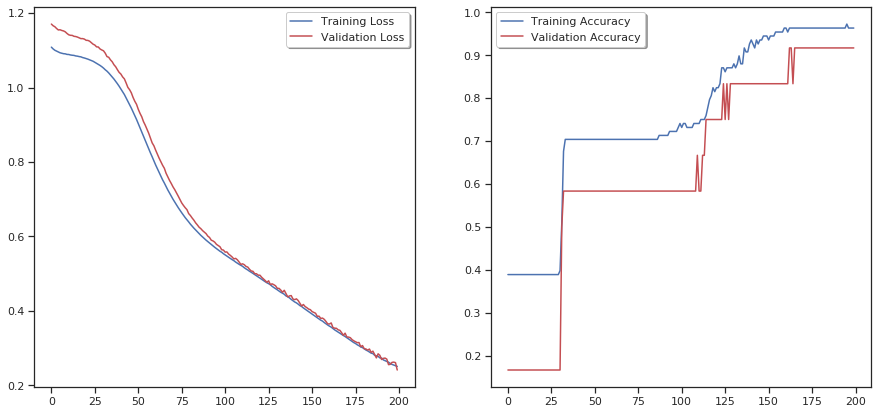

In [57]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [33]:
evaluation = model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 731us/step - loss: 0.2868 - accuracy: 0.9333


In [58]:
print("Accuracy: %.1f" % (evaluation[1]*100))
print("Loss: %.1f" % (evaluation[0]*100))

Accuracy: 93.3
Loss: 17.8


In [59]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [60]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1348 - accuracy: 0.3889 - val_loss: 1.1839 - val_accuracy: 0.1667
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0944 - accuracy: 0.3889 - val_loss: 1.1575 - val_accuracy: 0.1667
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0655 - accuracy: 0.3889 - val_loss: 1.1209 - val_accuracy: 0.1667
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0473 - accuracy: 0.3889 - val_loss: 1.0940 - val_accuracy: 0.1667
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0200 - accuracy: 0.4352 - val_loss: 1.0775 - val_accuracy: 0.2500
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9872 - accuracy: 0.6389 - val_loss: 1.0555 - val_accuracy: 0.5833
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.6944 - val_loss: 1.0365 - val_accuracy: 0.5833
Epoch 8/200


Epoch 59/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9722 - val_loss: 0.1826 - val_accuracy: 1.0000
Epoch 60/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9630 - val_loss: 0.1877 - val_accuracy: 1.0000
Epoch 61/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9722 - val_loss: 0.1688 - val_accuracy: 1.0000
Epoch 62/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9630 - val_loss: 0.1831 - val_accuracy: 1.0000
Epoch 63/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9722 - val_loss: 0.1595 - val_accuracy: 1.0000
Epoch 64/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9722 - val_loss: 0.1691 - val_accuracy: 1.0000
Epoch 65/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9630 - val_loss: 0.1658 - val_accuracy: 1.0000
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9815 - val_loss: 0.0954 - val_accuracy: 0.9167
Epoch 117/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9722 - val_loss: 0.1184 - val_accuracy: 0.9167
Epoch 118/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9815 - val_loss: 0.0681 - val_accuracy: 1.0000
Epoch 119/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9815 - val_loss: 0.0918 - val_accuracy: 0.9167
Epoch 120/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9815 - val_loss: 0.1035 - val_accuracy: 0.9167
Epoch 121/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9815 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 122/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9815 - val_loss: 0.0855 - val_accuracy: 0.9167
Epoch 123/200

11/11 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9815 - val_loss: 0.1246 - val_accuracy: 0.9167
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9815 - val_loss: 0.1007 - val_accuracy: 0.9167
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9815 - val_loss: 0.0702 - val_accuracy: 0.9167
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9815 - val_loss: 0.1509 - val_accuracy: 0.9167
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9815 - val_loss: 0.0727 - val_accuracy: 0.9167
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9815 - val_loss: 0.0864 - val_accuracy: 0.9167
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9815 - val_loss: 0.1112 - val_accuracy: 0.9167
Epoch 180/200

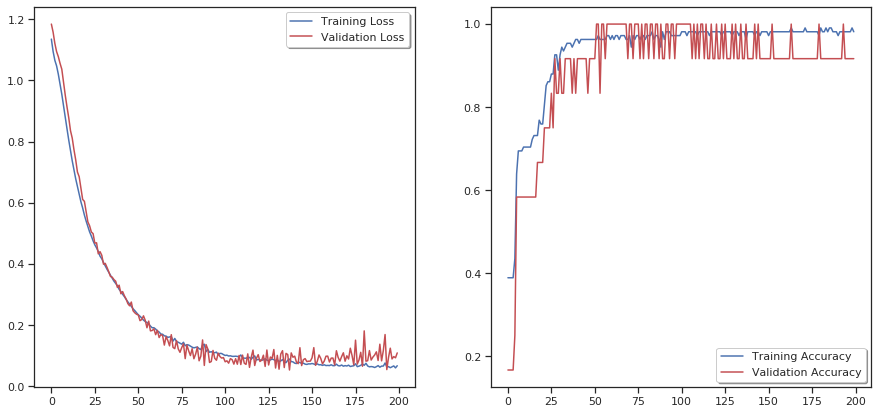

In [62]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [63]:
#Evaluation
evaluation = model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 678us/step - loss: 0.0222 - accuracy: 1.0000


In [64]:
print("Accuracy: %.1f" % (evaluation[1]*100))
print("Loss: %.1f" % (evaluation[0]*100))

Accuracy: 100.0
Loss: 2.2


In [65]:
#Prediction
Y_pred = model.predict(X)
for i in range(20):
    print(Y_pred[i])

[9.9226177e-01 7.6783681e-03 5.9836726e-05]
[9.918922e-01 8.045390e-03 6.243233e-05]
[9.9215490e-01 7.7844756e-03 6.0622373e-05]
[9.9181390e-01 8.1230514e-03 6.3069856e-05]
[9.9228352e-01 7.6567456e-03 5.9706985e-05]
[9.9222410e-01 7.7156625e-03 6.0157439e-05]
[9.9214077e-01 7.7984603e-03 6.0791484e-05]
[9.9212545e-01 7.8137834e-03 6.0836192e-05]
[9.9170578e-01 8.2304329e-03 6.3815416e-05]
[9.918840e-01 8.053430e-03 6.251481e-05]
[9.9230146e-01 7.6390509e-03 5.9540038e-05]
[9.919802e-01 7.957865e-03 6.192787e-05]
[9.9191260e-01 8.0251032e-03 6.2306564e-05]
[9.9218607e-01 7.7535012e-03 6.0414251e-05]
[9.9249411e-01 7.4478164e-03 5.8069654e-05]
[9.9244022e-01 7.5012078e-03 5.8548889e-05]
[9.9241793e-01 7.5233881e-03 5.8681228e-05]
[9.9225074e-01 7.6892781e-03 5.9917315e-05]
[9.9223471e-01 7.7053919e-03 6.0017686e-05]
[9.9228489e-01 7.6553612e-03 5.9722784e-05]


In [66]:
#Table de confusion
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
Y_test_class = np.argmax(Y_onehot,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

In [83]:
Y_test_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
Y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
print(classification_report(Y_test_class,Y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [85]:
print(confusion_matrix(Y_test_class,Y_pred_class))

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]
